This script tested the toolbox for subplate-relevant genes. Here, genes are used in original order of DK atlas, not sorted.

In [1]:
import os
import enigmatoolbox
import numpy as np
import pandas as pd

from scipy.stats.mstats import spearmanr, pearsonr
from statsmodels.stats.multitest import fdrcorrection

In [2]:
# Import tmaps, ordered as in original AHBA
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\tmaps\entrez_compatible')
CT = pd.read_csv('T_lhrh_thickness_term-preterm.csv')
GYR = pd.read_csv('T_lhrh_gyrification_term-preterm.csv')
CT.head()

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness
0,-0.051,0.042,0.059,0.042,-0.065,-0.027,-0.079,-0.027,-0.123,-0.023,...,-0.025,0.066,0.023,-0.067,-0.016,-0.063,-0.127,-0.234,0.011,-0.034


In [3]:
# Import gene expression data, ordered as in original AHBA
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\microarray')
genes = pd.read_csv('expression_brainorder.csv', index_col=0).T
reglabels = list(genes.index)
genelabels = list(genes.columns)
print("Your input gene list contains expression data for", len(genelabels), "across", len(reglabels), "regions...")
genes.head()

Your input gene list contains expression data for 15633 across 68 regions...


gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
L_bankssts,0.440726,0.589278,0.381510,0.436797,0.467330,0.483065,0.452128,0.543946,0.536256,0.588966,...,0.486024,0.533246,0.522263,0.601487,0.587398,0.405509,0.634875,0.497207,0.666547,0.477138
L_caudalanteriorcingulate,0.678336,0.431307,0.572806,0.671694,0.480824,0.503408,0.355954,0.368647,0.556326,0.584441,...,0.387346,0.363805,0.343892,0.549072,0.387021,0.633337,0.349052,0.223801,0.406646,0.503784
L_caudalmiddlefrontal,0.520608,0.446375,0.609580,0.459314,0.501768,0.542337,0.516451,0.527325,0.416930,0.433428,...,0.486235,0.506752,0.408213,0.448193,0.453520,0.438250,0.429106,0.587044,0.404144,0.529791
L_cuneus,0.317040,0.307230,0.451889,0.477776,0.474542,0.471519,0.687771,0.399432,0.566165,0.440505,...,0.590275,0.526024,0.370078,0.550802,0.423469,0.451572,0.444684,0.829026,0.733465,0.387726
L_entorhinal,0.711983,0.261514,0.699565,0.514992,0.455938,0.476981,0.313874,0.296195,0.600913,0.489880,...,0.368767,0.372662,0.779778,0.435531,0.376815,0.562862,0.542200,0.085269,0.453389,0.591145


In [4]:
# convert to numpy array
genes_np = genes.to_numpy()
CT_np = CT.to_numpy()
CT_np = np.squeeze(CT_np)
GYR_np = GYR.to_numpy()
GYR_np = np.squeeze(GYR_np)

# Thickness

#### subplate

In [27]:
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\results\hypothesis-driven\pathophysiology\subplate_neurons')
#os.makedirs('results/hypothesis-driven/pathophysiology-enigma/subplate_neurons', exist_ok=True)
subplate = pd.read_excel('Hoerder-Suabedissen supp sd02.xlsx', sheet_name='SP enriched - single gene list')
subplate_genes = list(subplate['Gene Symbol'].unique())

In [28]:
#convert all gene names to uppercase letters -> often human counterpart to murine genes
subplate_genes=[x.upper() for x in subplate_genes]
subplate_genes_human = []

# test for how many genes that has worked
for gene in subplate_genes:
    if gene in genes.columns:
        subplate_genes_human.append(gene)

# add the genes manually to the list that were not recognized properly
subplate_genes_human.append('RBM25')
subplate_genes_human.append('C8orf46') #3110035E14RIK in mice
subplate_genes_human.append('ABCA8') #Abca8a in mice
subplate_genes_human.append('ATP6V0E1') #Atp6v0e in mice
subplate_genes_human.append('ATP6V0E2') #Atp6v0e in mice
subplate_genes_human.append('MEIS2') #Meis2 in mice
#subplate_genes_human.remove('NAMPT') #PBEF-1 in mice
#PEG3 and homologs not found in AHBA data
#same for PHYHIPL
subplate_genes_human


tested_genes = open('tested_genes.txt', 'a')
for gene in subplate_genes_human:
    print(gene, file=tested_genes)
tested_genes.close()

len(subplate_genes_human)
#subplate_genes_human

373

In [31]:
from enigmatoolbox.permutation_testing import spin_test, perm_sphere_p
# generate empty array with 3 columns for gene index, Spearman'r, pval, pval_fdr, pval_spin

corr_coeffs_CT = np.zeros([len(subplate_genes_human),5])
corr_coeffs_GYR = np.zeros([len(subplate_genes_human),5])
subplate_genes_human_short = subplate_genes_human[1:2]

for modality in ['CT','GYR']:
    print('-------------------------------')
    print("Modality: ", modality)
    if modality == 'CT':
        measure = CT_np
        output = corr_coeffs_CT
    elif modality == 'GYR':
        measure = GYR_np
        output = corr_coeffs_GYR
    
    # start calculations
    i=0
    for g in subplate_genes_human:
        print("Performing correlation for gene:", g, "...")
        geneHere = genes.loc[:,g]
        coef, p = spearmanr(geneHere, measure)
        p_spin = spin_test(geneHere, measure, surface_name='fsa5', parcellation_name='aparc', type='spearman', n_rot=1000, null_dist=False)
        #print(geneHere)
        #save values in array
        #output[1,0] = int(g)
        output[i,1] = coef
        output[i,2] = p
        output[i,4] = p_spin
        i=i+1


-------------------------------
Modality:  CT
Performing correlation for gene: SLAIN1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ABCA2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ABCD4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ACVR2A ...
permutation 100 of 1000
permutation 200 of 1000
permutati

permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: BNIP3L ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: BTG2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: C1QA ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CABP7 ...
permutati

permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CHRNA4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CHST11 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CHST2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation fo

permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CTSS ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CTTNBP2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CUX1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
perm

permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ETV5 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: FAIM2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: FEM1B ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permu

permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: GNG11 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: GNG12 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: GNG4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permu

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: HRH3 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: HS3ST1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ID4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permut

Performing correlation for gene: LGMN ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: LHX2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: LMBRD1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: LOXL1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutatio

permutation 1000 of 1000
Performing correlation for gene: MXD3 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: MXI1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: MYT1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: NCAM2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation

permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: OSTF1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: OXR1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: PCDH11X ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: PCDH17 ...
permutation 100 of 1000
permutation 200 of 1000
permut

permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RAB26 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RAI14 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RCAN2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RGS20 ...
permutat

permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SIRPA ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SLC1A2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SLC6A1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
P

permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TMEM163 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TMEM40 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TPBG ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
pe

Performing correlation for gene: ABCD4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ACVR2A ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ADAM10 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ADAMTS1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permu

permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: C1QA ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CABP7 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CACNA2D3 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CACNB2 ...
permutation 100 of 1000
permutation 200 of 1000
permu

permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CHST2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CIDEA ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CITED2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CKS2 ...
permutation 100 of 1000
permutat

permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CUX1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: CUX2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: DACT1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for ge

permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: FEM1B ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: FGFR1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: FN1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Perfo

permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: GNG4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: GOLPH3 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: GPC6 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permu

permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: ID4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: IGF1R ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: IGFBP3 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permu

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: LOXL1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: LPAR1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: LRCH2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
perm

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: NCAM2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: NCOR1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: NDE1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permu

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: PCDH17 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: PCP4 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: PCSK5 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
perm

Performing correlation for gene: RCAN2 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RGS20 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RGS8 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: RHOA ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation

permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SLC6A1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SLC8A1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SLITRK3 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: SORBS2 ...
permutation 100 of 1000
permutation 200 of 1000
per

permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TPBG ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TPD52L1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TPPP ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: TRH ...
permutatio

In [32]:
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\ENIGMA\results')

for modality in ['CT','GYR']:
    print('-------------------------------')
    print("Modality: ", modality)
    if modality == 'CT':
        output = corr_coeffs_CT
    elif modality == 'GYR':
        output = corr_coeffs_GYR
        
        
    results=pd.DataFrame(output)
    results.columns = ['gene_symbol', 'Spearman_r', 'p', 'p_fdr', 'p_spin']
    results['gene_symbol'] = subplate_genes_human
    # adjust for FDR
    pval = results.iloc[:,2].values
    pval_fdr = list(fdrcorrection(pval)[1])
    results['p_fdr'] = pval_fdr
    # adjust for p_spin_fdr
    pspinval=results.iloc[:,4].values
    pspinval_fdr = list(fdrcorrection(pspinval)[1])
    results['p_spin_fdr'] = pspinval_fdr

    results.sort_values(['p_spin'], ascending=True).head(20)
    results.to_csv('hypothesis-driven_subplate_'+modality+'.csv')


-------------------------------
Modality:  CT
-------------------------------
Modality:  GYR


### all

In [6]:
from enigmatoolbox.permutation_testing import spin_test, perm_sphere_p
numGenes = 20

# generate empty array with 3 columns for gene index, Spearman'r, pval, pval_fdr, pval_spin
corr_coeffs_CT = np.zeros([numGenes,5])

for g in range(0, numGenes):
#for g in range(0,len(genelabels)):
    print("Performing correlation for gene:", genelabels[g], "...")
    geneHere = genes.iloc[:,g]
    coef, p = spearmanr(geneHere, CT_np)
    p_spin = spin_test(geneHere, CT_np, surface_name='fsa5', parcellation_name='aparc', type='spearman', n_rot=1000, null_dist=False)
    
    #save values in array
    corr_coeffs_CT[g,0] = int(g)
    corr_coeffs_CT[g,1] = coef
    corr_coeffs_CT[g,2] = p
    corr_coeffs_CT[g,4] = p_spin


Performing correlation for gene: A1BG ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: A1BG-AS1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: A2M ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Performing correlation for gene: A2ML1 ...
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutati

In [12]:
# view results
results = pd.DataFrame(corr_coeffs_CT)
results.columns = ['gene_symbol', 'Spearman_r', 'p', 'p_fdr', 'p_spin']
results['gene_symbol'] = genelabels[0:numGenes]

# get p_fdr
pval = results.iloc[:,2].values
# adjust for FDR
pval_fdr = list(fdrcorrection(pval)[1])
results['p_fdr'] = pval_fdr
results.head(20)
# get significant genes based on p_spin
#results.sort_values(['p_spin'], ascending=False)

,gene_symbol,Spearman_r,p,p_fdr,p_spin
0,A1BG,-0.054057,0.661518,0.877583,0.2925
1,A1BG-AS1,-0.257132,0.034278,0.298816,0.0110
2,A2M,0.226286,0.063517,0.317586,0.0340
3,A2ML1,0.092423,0.453485,0.824519,0.2510
4,A3GALT2,0.147720,0.229302,0.604082,0.1435
5,A4GALT,-0.019031,0.877583,0.877583,0.4550
6,AAAS,0.244133,0.044822,0.298816,0.0210
7,AACS,-0.153886,0.210232,0.604082,0.0965
8,AADACL3,0.251577,0.038498,0.298816,0.0260
9,AADAT,-0.143922,0.241633,0.604082,0.1165


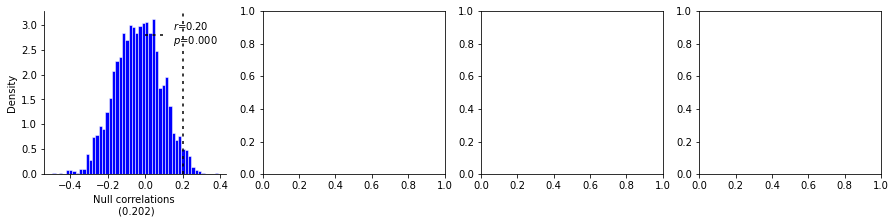

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(15, 3))


    # Plot null distributions

    
axs[0].hist(b, bins=50, density=True, color='b', edgecolor='white', lw=0.5)
axs[0].axvline(a, lw=1.5, ls='--', color='k', dashes=(2, 3), label='$r$={:.2f}'.format(a) + '\n$p$={:.3f}'.format(b[0]))
axs[0].set_xlabel('Null correlations \n ({})'.format(a))

axs[0].set_ylabel('Density')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].legend(loc=1, frameon=False)
    

plt.show()